In [4]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [7]:
# glove词向量的地址
glove_file = datapath('/Users/chengxin/workspace/pythonprojects/NLPLearn/stanford_cs224n/lecture01_Introduction_and_Word Vectors/Glove/glove.6B.100d.txt')

# 转换成word2vec的词向量文件地址，可以不存在，会自动创建
word2vec_glove_file = get_tmpfile("/Users/chengxin/workspace/pythonprojects/NLPLearn/stanford_cs224n/lecture01_Introduction_and_Word Vectors/Glove/glove.6B.100d.word2vec.txt")

# 调用glove2word2vec函数将glove词向量转换成word2vec格式
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [8]:
# Gensim word vector visualization of various word vectors

In [9]:
# 加载转换后的词向量model
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [20]:
# 调用model的most_similar函数寻找某个词的近义词
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [21]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [22]:
# 调用model的most_similar函数寻找某个词的「当使用negative参数的时候」反义词
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [23]:
# 单词类比
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [24]:
# 定义了一个类别函数，
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [25]:
analogy('japan', 'japanese', 'australia')

'australian'

In [26]:
analogy('australia', 'beer', 'france')

'champagne'

In [27]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [28]:
analogy('tall', 'tallest', 'long')

'longest'

In [29]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [30]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [31]:
# 定义一个对词向量的PCA降维方法并可视化
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [32]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


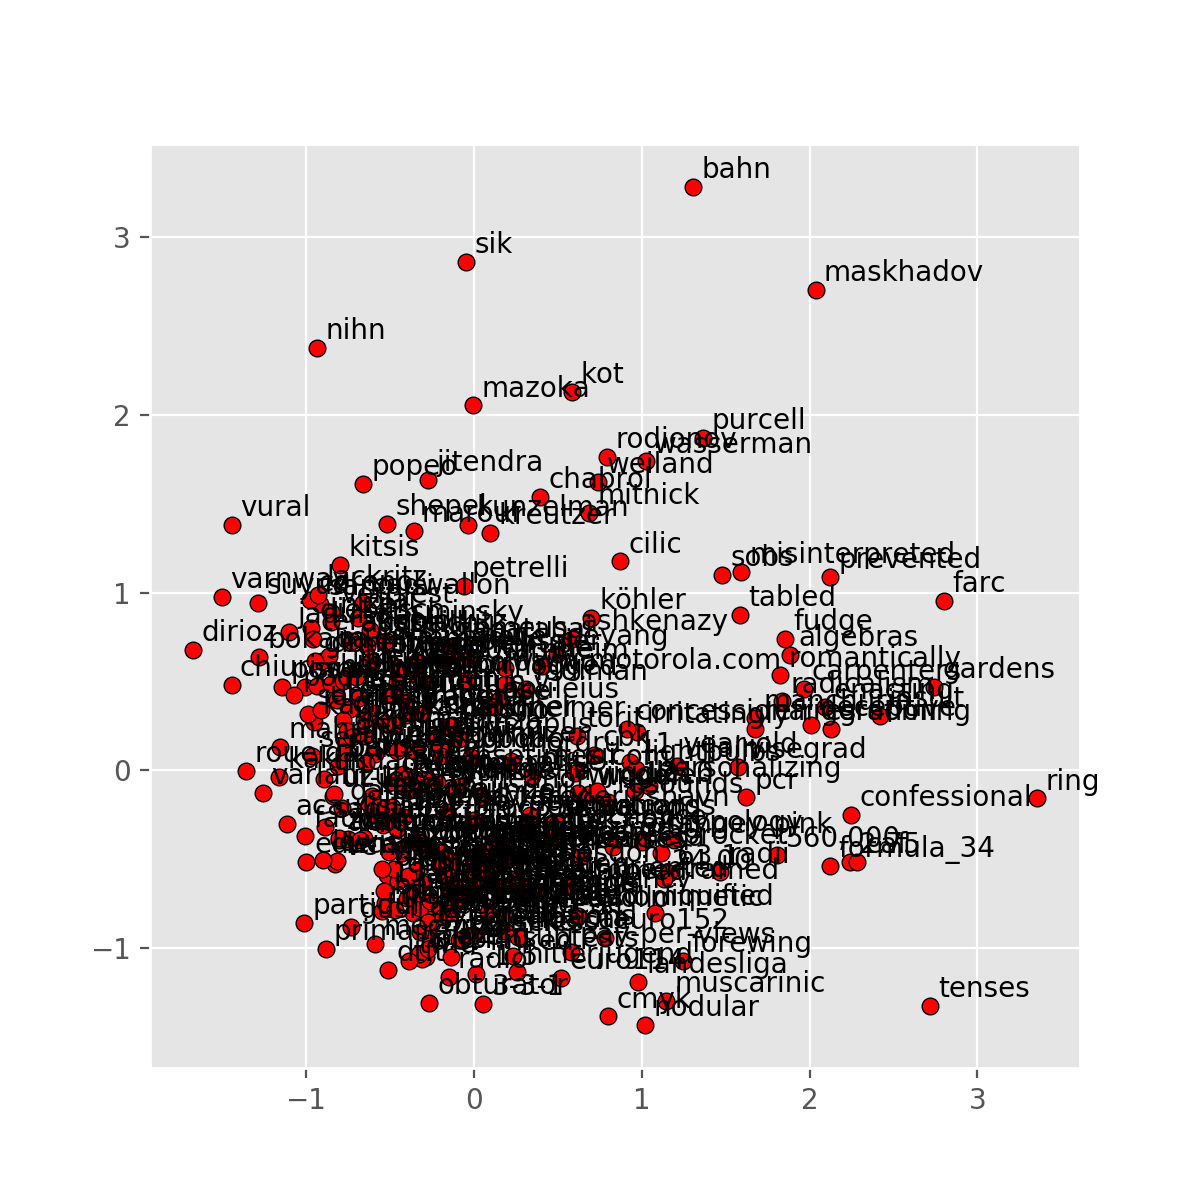

In [33]:
display_pca_scatterplot(model, sample=300)